# Tutorial: Finetune pretrained model using single cell data with addtional genes and prediction catagories

## Introduction

This tutorial demonstrates how to use **scGenAI** to fine-tune a model for predicting cell types using a new single-cell RNA sequencing (scRNA-seq) dataset that contains additional genes and cell types. In Fine-tune mode, the model template and context method will be automatically adopted from the pretrained model specified in the configuration file.

**Note:**
1. The dataset used for this tutorial consists of **50 cells**, selected for demonstration purposes. For practical applications, it is recommended to use a larger, more representative dataset.



## Fine-tune the Model (Multiple GPU)

The training process can be easily initiated by calling the `run_finetune_from_config` function in **scGenAI**, using the input files specified in a configuration YAML file. Example template YAML files are available in the `scgenai/examples/config_templates` folder of the package. These templates provide the necessary structure for defining training parameters, model configurations, and input data locations.


In [1]:
from scGenAI.finetuning.finetune import run_finetune_from_config

model_dir: /home/ubuntu/scgenai/examples/testrun/test_random/best_model/
finetune_dir: /home/ubuntu/scgenai/examples/testrun/test1/
train_file: /home/ubuntu/scgenai/examples/data/example_fintunetrain.h5ad
val_file: /home/ubuntu/scgenai/examples/data/example_fintuneval.h5ad
log_dir: /home/ubuntu/scgenai/examples/logs/
output_dir: /home/ubuntu/scgenai/examples/output
seed: 1314521
cache_dir: /home/ubuntu/scgenai/examples/tmp/cache
mode: Finetune
min_cells: 2
target_feature: ct
multiomics: No
keepIntermediateFiles: No
savelog: Yes
savesetting: Yes
model_backbone_name: llama
model_backbone_size: small
context_method: random
num_bins: 10
optimizer: AdamW
weight_decay: 0.01
depth: 2
max_length: 5120
batch_size: 1
learning_rate: 1e-05
num_epochs: 20
world_size: 1
evaluate_during_training: True
hidden_size: 768
num_layers: 12
num_heads: 12
intermediate_size: 1024
stride: 2560


2024-10-16 01:17:46.876 | INFO     | scGenAI.finetuning.finetune:FinetunePreprocessing:68 - New genes found: 3923. Updating custom_tokenizer.
2024-10-16 01:17:46.882 | INFO     | scGenAI.finetuning.finetune:FinetunePreprocessing:79 - New target labels found: 2. Updating label encoder.
2024-10-16 01:18:02.519 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 0, Total GPUs used: 4
2024-10-16 01:18:02.524 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 3, Total GPUs used: 4
2024-10-16 01:18:02.532 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 1, Total GPUs used: 4
2024-10-16 01:18:02.533 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 2, Total GPUs used: 4
2024-10-16 01:18:05.049 | INFO     | scGenAI.finetuning.finetune:model_finetune_and_eval:132 - Total number of trainable parameters: 77781380;

Plot saved to /home/ubuntu/scgenai/examples/testrun/test1/train_summary.pdf


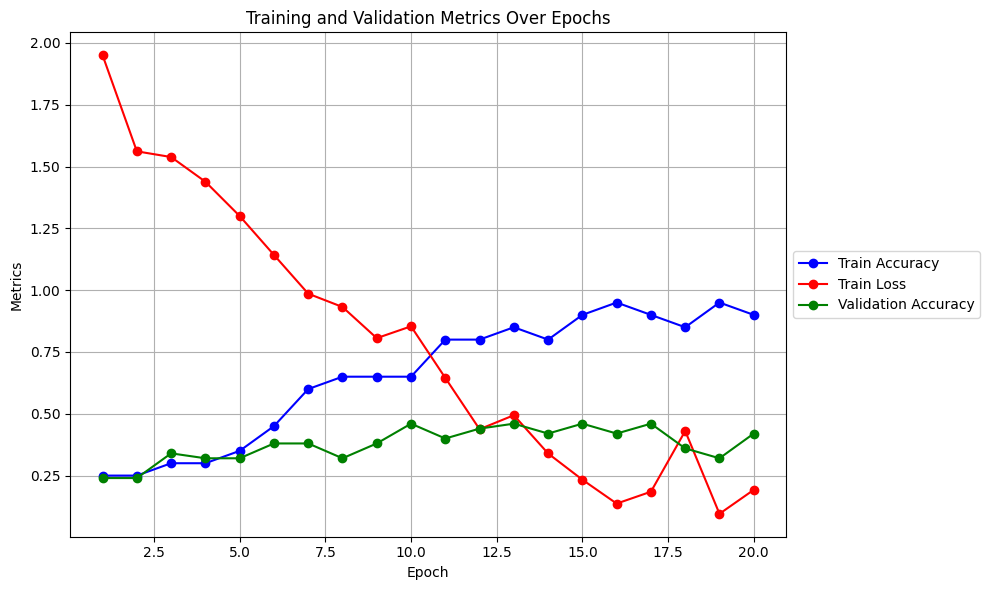

In [3]:
config_file = '/home/ubuntu/scgenai/tutorials/yaml/config_Finetune_random_context_template_llama.yaml'
run_finetune_from_config(config_file)

## Post-Training Model and Results

Upon completion of the training, the trained model will be saved in the `model_dir` as defined in the configuration file. Within this directory, two subfolders will be created: `best_model` and `last_model`. The `best_model` folder contains the model that achieved the highest training performance, while the `last_model` contains the model from the final epoch. Additionally, a `combined_epoch_results.csv` file will be generated in the `model_dir`, summarizing the training performance metrics across all epochs.

### Training Summary

In addition to the output summary files generated after training, the training summary can be directly accessed in Python by loading the saved configuration file.


In [4]:
from scGenAI.config import Config
from scGenAI.data.postprocess import TrainSummary

In [6]:
config = Config(config_file)
summary = TrainSummary(config.finetune_dir)
dfsummary = summary.table()
dfsummary

,Epoch,Validation Accuracy,Train Loss,Train Accuracy
0,1,0.24,1.950152,0.25
1,2,0.24,1.561550,0.25
2,3,0.34,1.538457,0.30
3,4,0.32,1.438592,0.30
4,5,0.32,1.299910,0.35
5,6,0.38,1.142553,0.45
6,7,0.38,0.985799,0.60
7,8,0.32,0.931961,0.65
8,9,0.38,0.805942,0.65
9,10,0.46,0.853778,0.65


It can also be plotted using the `summary.plot`:

Plot saved to /home/ubuntu/scgenai/examples/testrun/test1/train_summary.pdf


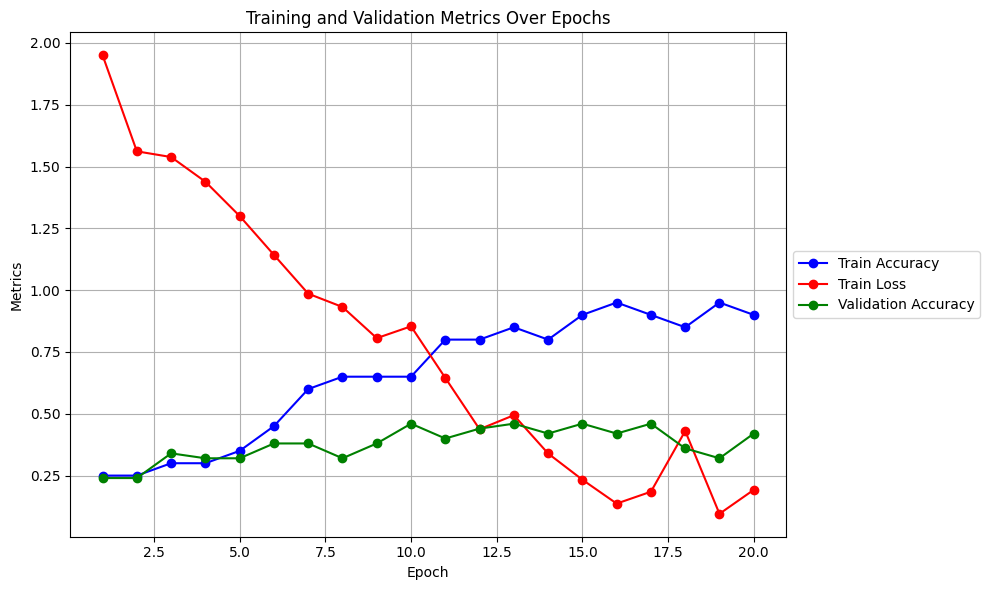

In [7]:
summary.plot(saveplot=True)

## Prediction Using the Trained Model

Similar to the training step, predictions can be run using the `run_prediction_from_config` function in scGenAI with a simple configuration file. Unlike the training configuration, the prediction configuration file only requires the following parameters to be defined: `mode`, `predict_file`, `batch_size`, `model_dir`, and `outputfile`. All other parameters will be adopted from the trained model.


In [8]:
from scGenAI.prediction.predict import run_prediction_from_config

In [11]:
pred_config_file = '/home/ubuntu/scgenai/tutorials/yaml/config_prediction_finetune_template.yaml'
run_prediction_from_config(pred_config_file)

model_dir: /home/ubuntu/scgenai/examples/testrun/test1/best_model/
predict_file: /home/ubuntu/scgenai/examples/data/example_fintuneval.h5ad
log_dir: /home/ubuntu/scgenai/examples/logs
output_dir: /home/ubuntu/scgenai/examples/output
outputfile: /home/ubuntu/scgenai/examples/testrun/test1/test.Predict.csv
seed: 1314521
mode: Predict
min_cells: 50
multiomics: No
keepIntermediateFiles: No
savelog: No
savesetting: Yes
model_backbone_name: llama
model_backbone_size: normal
context_method: random
num_bins: 10
optimizer: AdamW
weight_decay: 0.01
depth: 2
max_length: 1024
batch_size: 8
learning_rate: 1e-05
num_epochs: 30
world_size: 1
evaluate_during_training: False
hidden_size: 768
num_layers: 12
num_heads: 12
intermediate_size: 3072
stride: 512


2024-10-16 01:31:44.087 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 3, Total GPUs used: 4
2024-10-16 01:31:44.093 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 0, Total GPUs used: 4
2024-10-16 01:31:44.111 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 1, Total GPUs used: 4
2024-10-16 01:31:44.114 | INFO     | scGenAI.utils.distributed:setup_distributed:26 - Distributed setup complete for GPU 2, Total GPUs used: 4
GPU 3 Predicting: 100%|██████████| 13/13 [00:03<00:00,  4.06it/s]
2024-10-16 01:31:50.521 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-10-16 01:31:50.521 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-10-16 01:31:50.522 | INFO     | scGenAI.utils.distributed:cleanup:33 - Cleaned up DDP environment
2024-10-16 01:31:50.522 | INFO     | scGenAI.utils.di

The prediction output is a CSV file, as defined in the configuration file. It contains the original metadata extracted from the input prediction file (`obs` slot) along with three additional columns: `context_id`, `PredictedFeature`, and `prediction_score`. 

- `context_id` represents the context used to determine the prediction for the corresponding cell. 
- `PredictedFeature` is the final predicted feature for the cell using the trained model. 
- `prediction_score` indicates the confidence level of the prediction, with a maximum value of 1.

For example in this tutorials:

In [12]:
import pandas as pd
preconfig = Config(pred_config_file)
dfprediction = pd.read_csv(preconfig.outputfile)
dfprediction.head()

,index,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,seurat_clusters,sample,sampleId,projectId,sampleType,...,subjectId,age,gender,processStatus,predicted_cell_type,ct,cell_barcode,context_id,PredictedFeature,prediction_score
0,CCTAGCTAGTAGGTGC-1--GSM3993355,SeuratProject,8961,2086,11,11,GSM3993355,GSM3993355,GSE135194,Normal,...,NaN,44.0,M,QC pass,17:granulocyte,Granulocyte,CCTAGCTAGTAGGTGC-1--GSM3993355,1_CCTAGCTAGTAGGTGC-1--GSM3993355_window_7,Erythroblast,0.959399
1,ACTTACTAGTGACTCT-1--GSM3993354,SeuratProject,2469,862,11,11,GSM3993354,GSM3993354,GSE135194,Normal,...,NaN,41.0,F,QC pass,9:granulocyte,Granulocyte,ACTTACTAGTGACTCT-1--GSM3993354,0_ACTTACTAGTGACTCT-1--GSM3993354_window_10,Conventional dendritic cell,0.935634
2,AAATGCCTCGGTCCGA-1--GSM3993353,SeuratProject,14734,3142,11,11,GSM3993353,GSM3993353,GSE135194,Normal,...,NaN,31.0,F,QC pass,9:granulocyte,Granulocyte,AAATGCCTCGGTCCGA-1--GSM3993353,3_AAATGCCTCGGTCCGA-1--GSM3993353_window_22,Erythroblast,0.972174
3,TCAATCTAGCCCAACC-1--GSM3993355,SeuratProject,9643,2353,11,11,GSM3993355,GSM3993355,GSE135194,Normal,...,NaN,44.0,M,QC pass,9:granulocyte,Granulocyte,TCAATCTAGCCCAACC-1--GSM3993355,0_TCAATCTAGCCCAACC-1--GSM3993355_window_31,Erythroblast,0.973271
4,TTTGGTTTCGGTGTCG-1--GSM3993353,SeuratProject,8884,1917,11,11,GSM3993353,GSM3993353,GSE135194,Normal,...,NaN,31.0,F,QC pass,17:granulocyte,Granulocyte,TTTGGTTTCGGTGTCG-1--GSM3993353,2_TTTGGTTTCGGTGTCG-1--GSM3993353_window_36,Erythroblast,0.935915
